# Alvaro José Bolaños Vega
# A00838866

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('diabetes.csv')
diabetes.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [68]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [70]:
diabetes.groupby('Diabetes').size()

Diabetes
0    500
1    268
dtype: int64

Diabetes
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

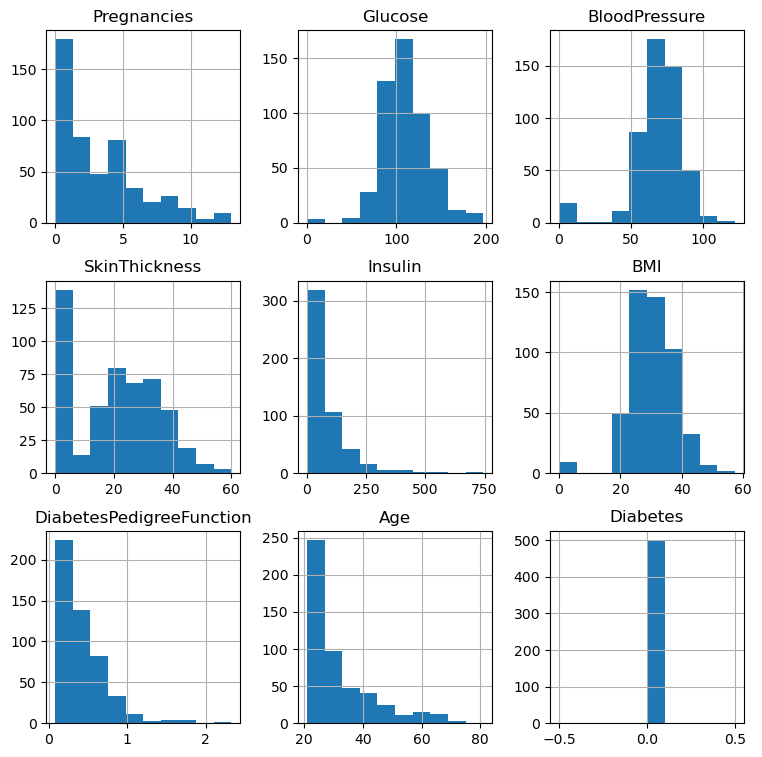

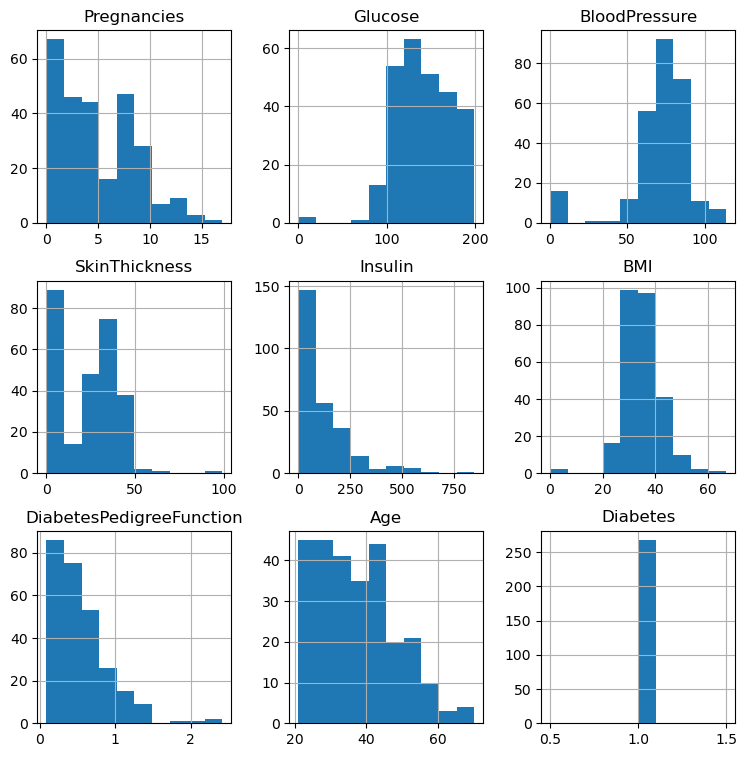

In [71]:
diabetes.groupby('Diabetes').hist(figsize=(9, 9))

In [72]:
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [73]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])

print(diabetes[diabetes.BloodPressure == 0].groupby('Diabetes')['Age'].count())

Total :  35
Diabetes
0    19
1    16
Name: Age, dtype: int64


In [74]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])

print(diabetes[diabetes.Glucose == 0].groupby('Diabetes')['Age'].count())

Total :  5
Diabetes
0    3
1    2
Name: Age, dtype: int64


In [75]:
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])
print(diabetes[diabetes.SkinThickness == 0].groupby('Diabetes')['Age'].count())

Total :  227
Diabetes
0    139
1     88
Name: Age, dtype: int64


In [76]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Diabetes')['Age'].count())

Total :  11
Diabetes
0    9
1    2
Name: Age, dtype: int64


In [77]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print(diabetes[diabetes.Insulin == 0].groupby('Diabetes')['Age'].count())

Total :  374
Diabetes
0    236
1    138
Name: Age, dtype: int64


In [78]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


In [79]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Diabetes

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(probability=True)))
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Diabetes, random_state=0)

In [84]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.740331
2   LR  0.779006
3   DT  0.707182
4  GNB  0.734807
5   RF  0.773481
6   GB  0.773481


  Name  Accuracy  Precision    Recall        F1
0  KNN  0.729282   0.627451  0.516129  0.566372
1  SVC  0.740331   0.674419  0.467742  0.552381
2   LR  0.779006   0.703704  0.612903  0.655172
3   DT  0.734807   0.612903  0.612903  0.612903
4  GNB  0.734807   0.612903  0.612903  0.612903
5   RF  0.795580   0.745098  0.612903  0.672566
6   GB  0.773481   0.690909  0.612903  0.649573


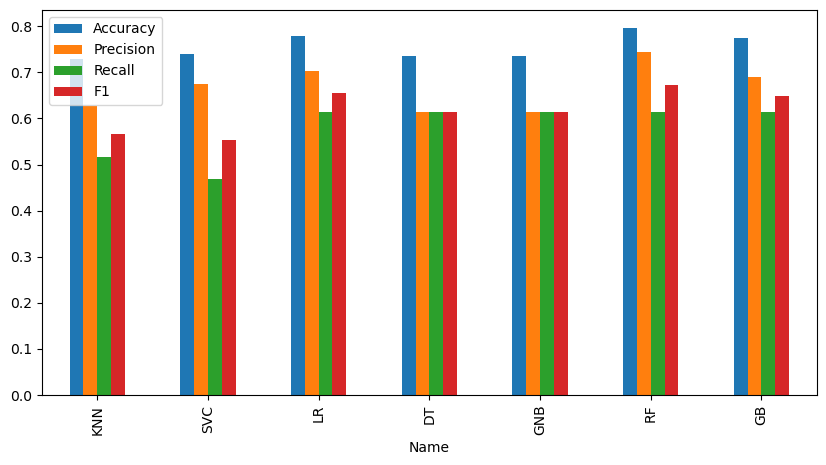

In [85]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, 'F1': f1_scores})
print(tr_split)

# Plot results per metric
tr_split.set_index('Name', drop=True, inplace=True)
tr_split.plot(kind='bar', figsize=(10, 5))
plt.show()

  Name       Confusion matrix
0  KNN  [[100, 19], [30, 32]]
1  SVC  [[105, 14], [33, 29]]
2   LR  [[103, 16], [24, 38]]
3   DT   [[94, 25], [24, 38]]
4  GNB   [[95, 24], [24, 38]]
5   RF  [[104, 15], [26, 36]]
6   GB  [[102, 17], [24, 38]]


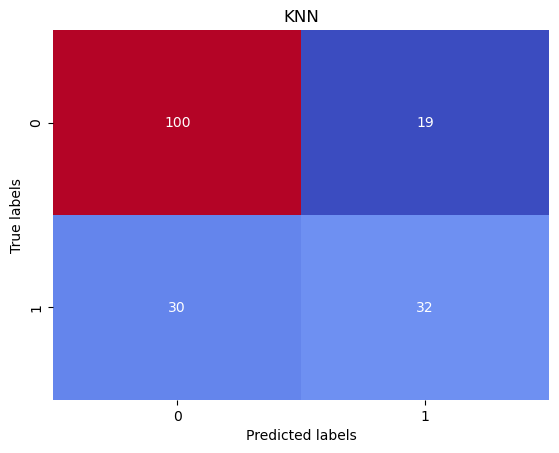

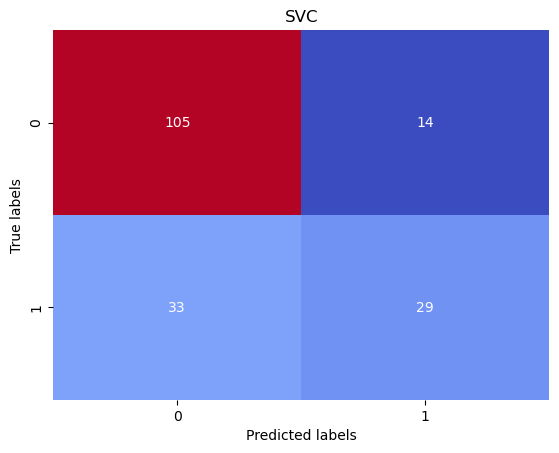

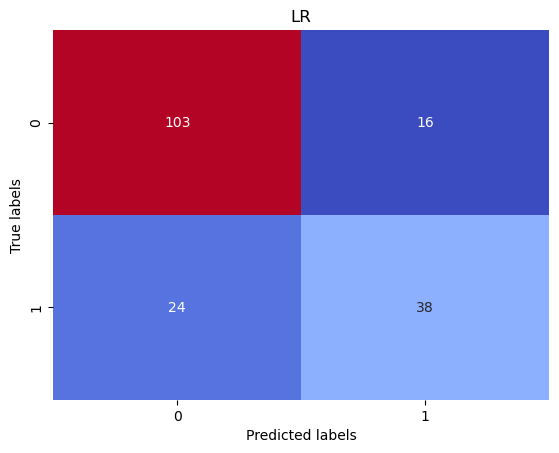

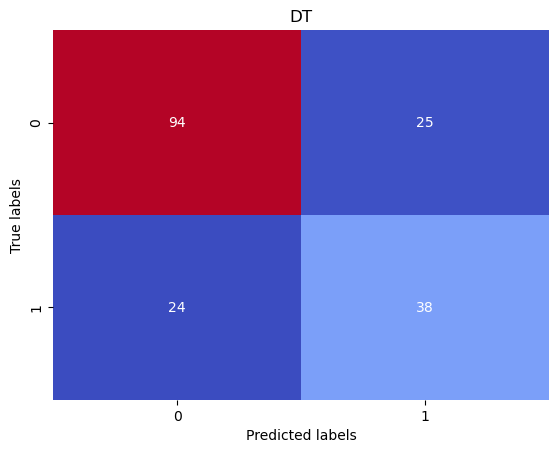

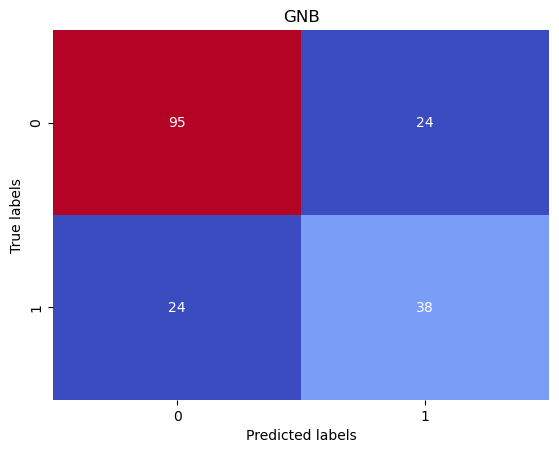

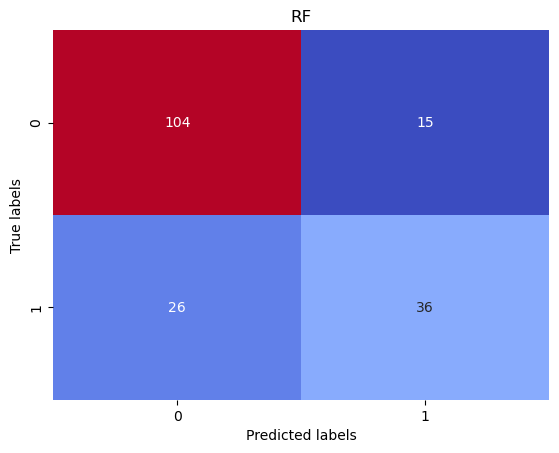

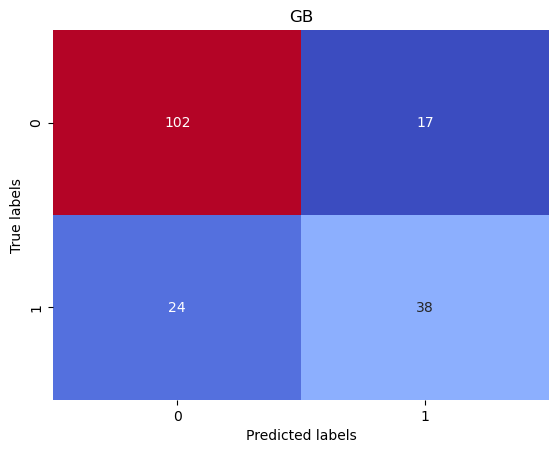

In [86]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

names = []
conf_matrix = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix.append(confusion_matrix(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Confusion matrix': conf_matrix})
print(tr_split)

# Plot results per model, individually
for i in range(len(models)):
    sns.heatmap(tr_split['Confusion matrix'][i], annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(tr_split['Name'][i])
    plt.show()




  Name   ROC AUC
0  KNN  0.746205
1  SVC  0.821361
2   LR  0.865140
3   DT  0.705272
4  GNB  0.809162
5   RF  0.845758
6   GB  0.849146


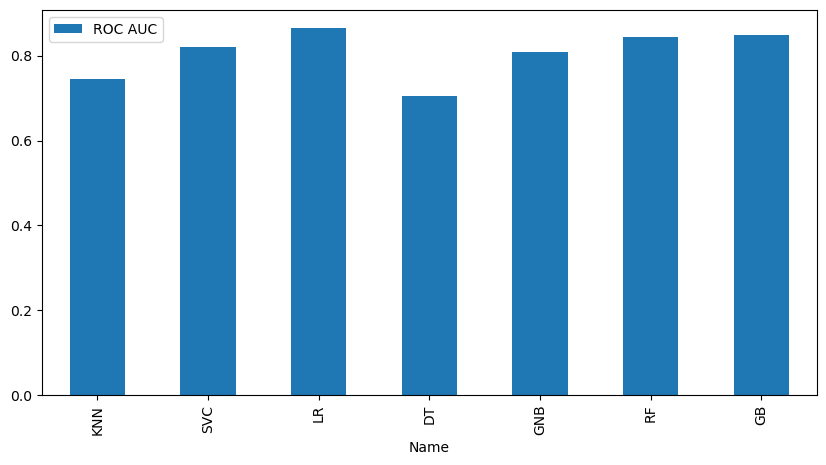

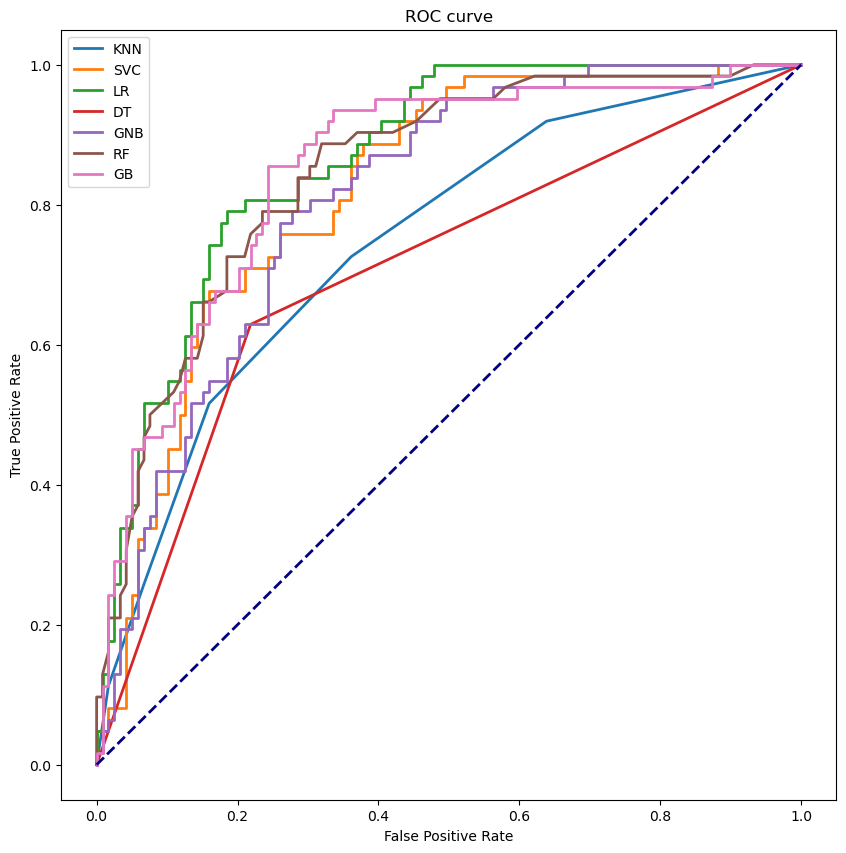

In [89]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

names = []
fpr = []
tpr = []
roc_auc = []
error = 0
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr_, tpr_, _ = roc_curve(y_test, y_pred_prob)
    fpr.append(fpr_)
    tpr.append(tpr_)
    roc_auc.append(roc_auc_score(y_test, y_pred_prob))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'ROC AUC': roc_auc})
print(tr_split)

# Plot results per model
tr_split.set_index('Name', drop=True, inplace=True)
tr_split.plot(kind='bar', figsize=(10, 5))
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 10))
for i in range(len(models)):
    plt.plot(fpr[i], tpr[i], lw=2, label=names[i])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()


In [88]:
# Neural network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6685082872928176


/Users/alvarobolanos/opt/anaconda3/envs/TC2004B/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


¿Qué aspectos se revisaron para la preparación de datos? 
- Se revisaron los valores nulos y not a number, no habian por lo que no hubo que eliminar datos. Se reviso la distribucion de los datos por medio de histogramas y se compara la cantidad de casos de Diabetes/noDiabetes.


¿Qué cambios se hicieron?
- No se le hizo ninguna modificacion a los datos.

¿Qué modelos de aprendizaje se probaron?
- KNeighborsClassifier, SVC, LogisticRegression, DecisionTreeClassifier, GaussianNB, RandomForestClassifier, GradientBoostingClassifier y red neuronal.

Compara el resultado de todos los modelos. 
¿Cuál es mejor?
- Todos tienen desempeños muy similares pero GradientBoostingClassifier parece obtener los mejores resultados.